# Análisis Exploratorio de Datos – Credit Risk Dataset

Este proyecto tiene como objetivo explorar y comprender el comportamiento del dataset relacionado con solicitudes de crédito, con foco en la calidad de los datos, su distribución y las posibles relaciones entre variables.

El análisis busca preparar el terreno para una futura etapa de modelado predictivo.


## Importamos y vemos el dataset

In [3]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset (ajustar ruta si se usa en Colab)
ruta = "/content/credit_risk_dataset_v_original.csv"
data = pd.read_csv(ruta)
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## Descripción del Dataset

El dataset contiene registros de más de 32.000 personas, cada una con información relevante para evaluar su perfil crediticio.

| Columna                      | Descripción                                                              |
|-----------------------------|---------------------------------------------------------------------------|
| `person_age`                | Edad del solicitante                                                     |
| `person_income`             | Ingreso anual                                                            |
| `person_home_ownership`     | Tipo de tenencia del hogar (`RENT`, `OWN`, `MORTGAGE`, etc.)             |
| `person_emp_length`         | Años de empleo                                                           |
| `loan_intent`               | Motivo del préstamo (`EDUCATION`, `MEDICAL`, `VENTURE`, etc.)            |
| `loan_grade`                | Calificación del préstamo (`A`, `B`, `C`, etc.)                           |
| `loan_amnt`                 | Monto solicitado                                                         |
| `loan_int_rate`             | Tasa de interés                                                          |
| `loan_percent_income`       | Porcentaje del ingreso destinado al préstamo                             |
| `loan_status`               | Variable objetivo: `1` = default, `0` = sin incumplimiento               |
| `cb_person_default_on_file` | Indicador de si ha incumplido anteriormente (`Y` / `N`)                  |
| `cb_person_cred_hist_length`| Antigüedad del historial crediticio en años                              |

---

In [4]:
data.rename(columns={
    'person_age': 'edad',
    'person_income': 'ingreso_anual',
    'person_home_ownership': 'tenencia_vivienda',
    'person_emp_length': 'antiguedad_empleo',
    'loan_intent': 'motivo_prestamo',
    'loan_grade': 'calificacion_prestamo',
    'loan_amnt': 'monto_prestamo',
    'loan_int_rate': 'tasa_interes',
    'loan_percent_income': 'porcentaje_ingreso',
    'loan_status': 'incumplimiento',
    'cb_person_default_on_file': 'incumplimiento_previo',
    'cb_person_cred_hist_length': 'historial_crediticio_anios'
}, inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   edad                        32581 non-null  int64  
 1   ingreso_anual               32581 non-null  int64  
 2   tenencia_vivienda           32581 non-null  object 
 3   antiguedad_empleo           31686 non-null  float64
 4   motivo_prestamo             32581 non-null  object 
 5   calificacion_prestamo       32581 non-null  object 
 6   monto_prestamo              32581 non-null  int64  
 7   tasa_interes                29465 non-null  float64
 8   incumplimiento              32581 non-null  int64  
 9   porcentaje_ingreso          32581 non-null  float64
 10  incumplimiento_previo       32581 non-null  object 
 11  historial_crediticio_anios  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
data.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
edad,32581.0,27.7,6.3,20.0,23.0,26.0,30.0,144.0
ingreso_anual,32581.0,66074.8,61983.1,4000.0,38500.0,55000.0,79200.0,6000000.0
antiguedad_empleo,31686.0,4.8,4.1,0.0,2.0,4.0,7.0,123.0
monto_prestamo,32581.0,9589.4,6322.1,500.0,5000.0,8000.0,12200.0,35000.0
tasa_interes,29465.0,11.0,3.2,5.4,7.9,11.0,13.5,23.2
incumplimiento,32581.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0
porcentaje_ingreso,32581.0,0.2,0.1,0.0,0.1,0.2,0.2,0.8
historial_crediticio_anios,32581.0,5.8,4.1,2.0,3.0,4.0,8.0,30.0


## Ordenamos las columnas

In [7]:
# Reordenar columnas por tipo de dato: primero decimales, luego enteros, luego texto
float_cols = data.select_dtypes(include='float').columns.tolist()
int_cols = data.select_dtypes(include='int').columns.tolist()
obj_cols = data.select_dtypes(include='object').columns.tolist()

# Unir las listas en el orden deseado
ordered_columns = float_cols + int_cols + obj_cols

# Reordenar el DataFrame
data = data[ordered_columns]

# Mostrar las primeras filas para verificar
data.head()


,antiguedad_empleo,tasa_interes,porcentaje_ingreso,edad,ingreso_anual,monto_prestamo,incumplimiento,historial_crediticio_anios,tenencia_vivienda,motivo_prestamo,calificacion_prestamo,incumplimiento_previo
0,123.0,16.02,0.59,22,59000,35000,1,3,RENT,PERSONAL,D,Y
1,5.0,11.14,0.10,21,9600,1000,0,2,OWN,EDUCATION,B,N
2,1.0,12.87,0.57,25,9600,5500,1,3,MORTGAGE,MEDICAL,C,N
3,4.0,15.23,0.53,23,65500,35000,1,2,RENT,MEDICAL,C,N
4,8.0,14.27,0.55,24,54400,35000,1,4,RENT,MEDICAL,C,Y


# Limpieza del dataset

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Registros (filas) repetidos
2. Datos faltantes en algunas celdas
3. Columnas irrelevantes (que no responden al problema que queremos resolver)
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos

## 1 - Registros (filas) repetidos:

In [8]:
# Verificar si hay filas duplicadas
duplicados = data[data.duplicated()]

# Mostrar las filas duplicadas (si las hay)
print(f"🔍 Total de filas duplicadas: {duplicados.shape[0]}")
duplicados


🔍 Total de filas duplicadas: 165


,antiguedad_empleo,tasa_interes,porcentaje_ingreso,edad,ingreso_anual,monto_prestamo,incumplimiento,historial_crediticio_anios,tenencia_vivienda,motivo_prestamo,calificacion_prestamo,incumplimiento_previo
15975,5.0,9.99,0.14,23,42000,6000,0,4,RENT,VENTURE,B,N
15989,7.0,10.36,0.09,23,90000,8000,0,3,MORTGAGE,EDUCATION,B,N
15995,4.0,5.42,0.08,24,48000,4000,0,4,MORTGAGE,MEDICAL,A,N
16025,8.0,7.90,0.30,24,10000,3000,1,3,RENT,PERSONAL,A,N
16028,7.0,7.88,0.15,23,100000,15000,0,4,MORTGAGE,EDUCATION,A,N
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,2.0,5.42,0.06,42,39996,2500,0,12,MORTGAGE,HOMEIMPROVEMENT,A,N
32047,2.0,7.88,0.08,36,250000,20000,0,17,RENT,DEBTCONSOLIDATION,A,N
32172,12.0,10.99,0.10,49,120000,12000,0,12,MORTGAGE,MEDICAL,B,N
32259,4.0,10.37,0.03,39,40000,1000,0,16,OWN,VENTURE,B,N


In [9]:
# Cantidad de filas antes de eliminar duplicados
filas_antes = data.shape[0]

# Eliminar duplicados directamente en 'data'
data = data.drop_duplicates()

# Cantidad de filas después de eliminar duplicados
filas_despues = data.shape[0]

# Mostrar resumen
print(f"🧹 Se eliminaron {filas_antes - filas_despues} filas duplicadas.")


🧹 Se eliminaron 165 filas duplicadas.


## 2 - Datos faltantes:


In [10]:
# Calcular el porcentaje de valores faltantes por columna
faltantes = (data.isnull().mean().sort_values(ascending=False) * 100).round(1)

# Mostrar columnas con al menos un nulo
#faltantes = faltantes[faltantes > 0]

# Mostrar resultado
print("📊 Porcentaje de valores faltantes por columna:\n")
print(faltantes)

📊 Porcentaje de valores faltantes por columna:

tasa_interes                  9.5
antiguedad_empleo             2.7
porcentaje_ingreso            0.0
edad                          0.0
ingreso_anual                 0.0
monto_prestamo                0.0
incumplimiento                0.0
historial_crediticio_anios    0.0
tenencia_vivienda             0.0
motivo_prestamo               0.0
calificacion_prestamo         0.0
incumplimiento_previo         0.0
dtype: float64


### Imputación de valores faltantes mediante Machine Learning

Para mejorar la calidad del dataset, imputaremos los valores faltantes en dos columnas clave utilizando un modelo de regresión:

* **`tasa_interes`**: variable numérica continua.
* **`antiguedad_empleo`**: también numérica, con posible presencia de valores atípicos.

Se utilizará un modelo **RandomForestRegressor**, adecuado para capturar relaciones no lineales sin requerir normalización previa.

#### Estrategia aplicada:

1. Se separarán los registros con valores completos en la columna objetivo, que se usaron como conjunto de entrenamiento.
2. Se aislarán los registros con valores faltantes, que constituyeron el conjunto de predicción.
3. Se entrenará un modelo de regresión individual para cada columna con nulos.
4. Se estimarán los valores faltantes a partir de las demás variables numéricas sin nulos.
5. Finalmente, se reemplazarán los valores nulos con las predicciones del modelo.

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Copia de trabajo
data_imputado = data.copy()

# Función para imputar nulos con RandomForestRegressor
def imputar_columna_rf(df, columna_objetivo):
    # Seleccionar columnas numéricas y sin nulos
    columnas_entrada = df.select_dtypes(include=['float', 'int']).drop(columns=[columna_objetivo])
    columnas_entrada = columnas_entrada.columns[df[columnas_entrada.columns].isnull().sum() == 0]

    # Filas con y sin datos en la columna objetivo
    df_train = df[df[columna_objetivo].notnull()]
    df_pred = df[df[columna_objetivo].isnull()]

    # Si no hay datos faltantes, salir
    if df_pred.empty:
        print(f"✅ No hay nulos en '{columna_objetivo}'")
        return df

    # Entrenar el modelo
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(df_train[columnas_entrada], df_train[columna_objetivo])

    # Predecir los valores faltantes
    valores_imputados = model.predict(df_pred[columnas_entrada])

    # Reemplazar los nulos
    df.loc[df[columna_objetivo].isnull(), columna_objetivo] = valores_imputados
    print(f"🧠 '{columna_objetivo}' imputado con ML ({len(valores_imputados)} valores reemplazados).")
    return df

# Aplicar imputación a ambas columnas
data_imputado = imputar_columna_rf(data_imputado, 'tasa_interes')
data_imputado = imputar_columna_rf(data_imputado, 'antiguedad_empleo')


🧠 'tasa_interes' imputado con ML (3095 valores reemplazados).
🧠 'antiguedad_empleo' imputado con ML (887 valores reemplazados).


In [12]:
# Reemplazar el DataFrame original con el imputado
data = data_imputado.copy()
data.isnull().sum()

,0
antiguedad_empleo,0
tasa_interes,0
porcentaje_ingreso,0
edad,0
ingreso_anual,0
monto_prestamo,0
incumplimiento,0
historial_crediticio_anios,0
tenencia_vivienda,0
motivo_prestamo,0


## 3 - Columnas irrelevantes

### Identificación de columnas irrelevantes

Con el objetivo de optimizar el dataset y reducir ruido en los modelos de Machine Learning, se identificaron columnas potencialmente irrelevantes mediante los siguientes criterios:

* **Columnas constantes**: aquellas que contienen un único valor en todos los registros.
* **Columnas con muchos valores nulos**: se consideran irrelevantes si presentan más del 50% de datos faltantes.
* **Columnas con baja correlación con la variable objetivo** (`incumplimiento`): se consideran irrelevantes si tienen una correlación absoluta inferior a 0.05.
* **Columnas muy correlacionadas entre sí**: redundantes entre sí, con correlación mayor a 0.9, lo que puede afectar la multicolinealidad del modelo.

---

In [13]:
# 1. Columnas constantes (un solo valor)
columnas_constantes = [col for col in data.columns if data[col].nunique() == 1]

# 2. Columnas con más del 50% de nulos
umbral_nulos = 0.5
columnas_muchos_nulos = data.columns[data.isnull().mean() > umbral_nulos].tolist()

# 3. Columnas numéricas con baja correlación con la variable objetivo
correlaciones = data.corr(numeric_only=True)['incumplimiento'].abs().sort_values()
columnas_baja_correlacion = correlaciones[correlaciones < 0.05].index.tolist()

# 4. Columnas muy correlacionadas entre sí (> 0.9)
corr_matrix = data.corr(numeric_only=True).abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
columnas_muy_correlacionadas = [col for col in upper.columns if any(upper[col] > 0.9)]

# Mostrar resultados
print("Columnas constantes:\n", columnas_constantes)
print("\n Columnas con más del 50% de nulos:\n", columnas_muchos_nulos)
print("\nColumnas con baja correlación con 'incumplimiento' (< 0.05):\n", columnas_baja_correlacion)
print("\nColumnas muy correlacionadas entre sí (> 0.9):\n", columnas_muy_correlacionadas)


Columnas constantes:
 []

 Columnas con más del 50% de nulos:
 []

Columnas con baja correlación con 'incumplimiento' (< 0.05):
 ['historial_crediticio_anios', 'edad']

Columnas muy correlacionadas entre sí (> 0.9):
 []


<ipython-input-14-2416965091>:24: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


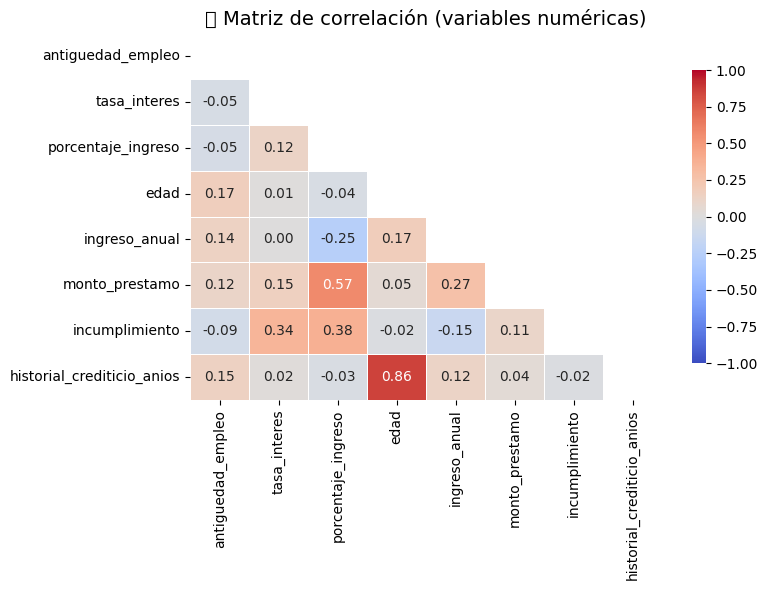

In [14]:
# Calcular matriz de correlación para variables numéricas
corr_matrix = data.corr(numeric_only=True)

# Crear una máscara para la mitad inferior
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Tamaño del gráfico
plt.figure(figsize=(8, 6))

# Heatmap con máscara, anotaciones y formato
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    vmin=-1, vmax=1,
    cbar_kws={"shrink": 0.8}
)

# Título del gráfico
plt.title("🔍 Matriz de correlación (variables numéricas)", fontsize=14)
plt.tight_layout()
plt.show()

> **Nota:**
> Aunque las variables `edad` e `historial_crediticio_anios` presentan una baja correlación lineal con la variable objetivo `incumplimiento` (correlación < 0.05), **no fueron eliminadas**.
> Esto se debe a que:
>
> * La correlación de Pearson solo capta relaciones lineales, y podrían existir **relaciones no lineales** o **interacciones** con otras variables.
> * Algoritmos como árboles de decisión, Random Forest o XGBoost pueden detectar **patrones complejos** donde estas variables resulten relevantes.
>
> Por ello, se decidió conservarlas para que el modelo tenga la oportunidad de evaluar su aporte real durante el entrenamiento.
---

## 4 - Valores extremos (outliers)

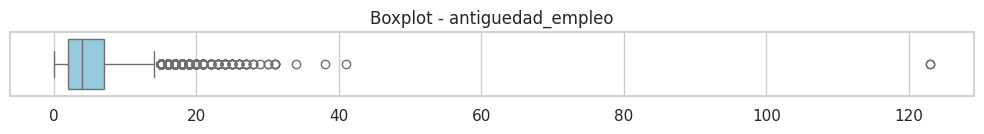

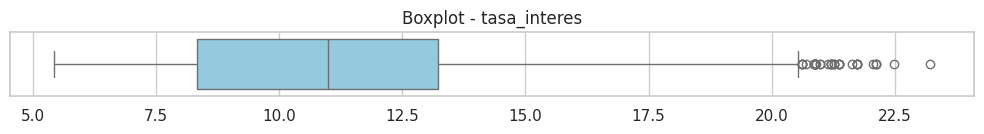

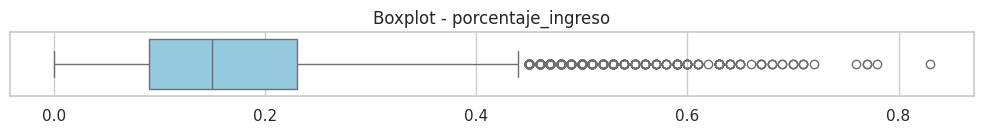

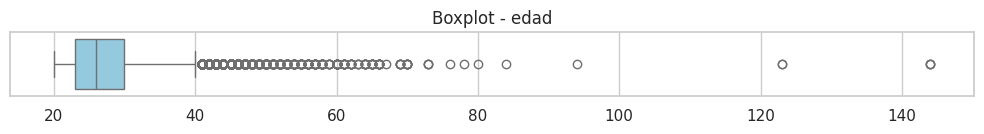

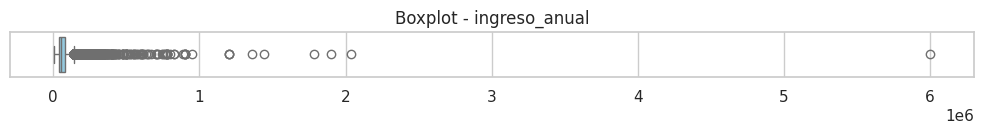

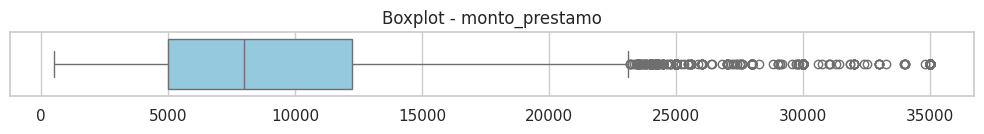

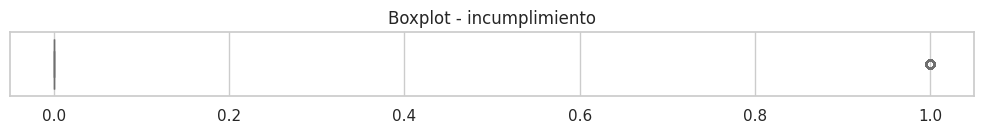

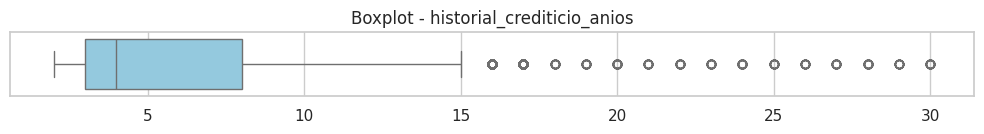

In [15]:
# Seleccionar solo columnas numéricas
columnas_numericas = data.select_dtypes(include=['int', 'float']).columns

# Configurar estilo
sns.set(style="whitegrid")

# Crear un boxplot por variable numérica
for col in columnas_numericas:
    plt.figure(figsize=(10, 1.5))
    sns.boxplot(x=data[col], color='skyblue')
    plt.title(f"Boxplot - {col}")
    plt.xlabel("")
    plt.grid(True, axis='x')
    plt.tight_layout()
    plt.show()

### Tratamiento de outliers: Winsorización

Para mitigar el impacto de valores extremos sin perder registros, se aplicaremos una estrategia de **winsorización** (capado) a las variables numéricas del dataset.

La técnica consiste en reemplazar los valores por debajo del **percentil 1** y por encima del **percentil 99** por esos límites, reduciendo así la distorsión que podrían generar los outliers en modelos sensibles a la escala.

> 🔒 **Importante:** la variable objetivo `incumplimiento` será excluida de este tratamiento para no alterar sus valores binarios (0 y 1).

In [16]:
# Excluir la variable objetivo
columnas_numericas = data.select_dtypes(include=['int', 'float']).columns.drop('incumplimiento')

# Aplicar winsorización solo a las variables numéricas predictoras
for col in columnas_numericas:
    p1 = data[col].quantile(0.01)
    p99 = data[col].quantile(0.99)
    data[col] = data[col].clip(lower=p1, upper=p99)
    print(f"✅ Winsorizado '{col}' entre {round(p1, 2)} y {round(p99, 2)}")


✅ Winsorizado 'antiguedad_empleo' entre 0.0 y 17.0
✅ Winsorizado 'tasa_interes' entre 5.42 y 18.39
✅ Winsorizado 'porcentaje_ingreso' entre 0.02 y 0.5
✅ Winsorizado 'edad' entre 21.0 y 50.0
✅ Winsorizado 'ingreso_anual' entre 14400.0 y 225000.0
✅ Winsorizado 'monto_prestamo' entre 1000.0 y 29800.0
✅ Winsorizado 'historial_crediticio_anios' entre 2.0 y 17.0


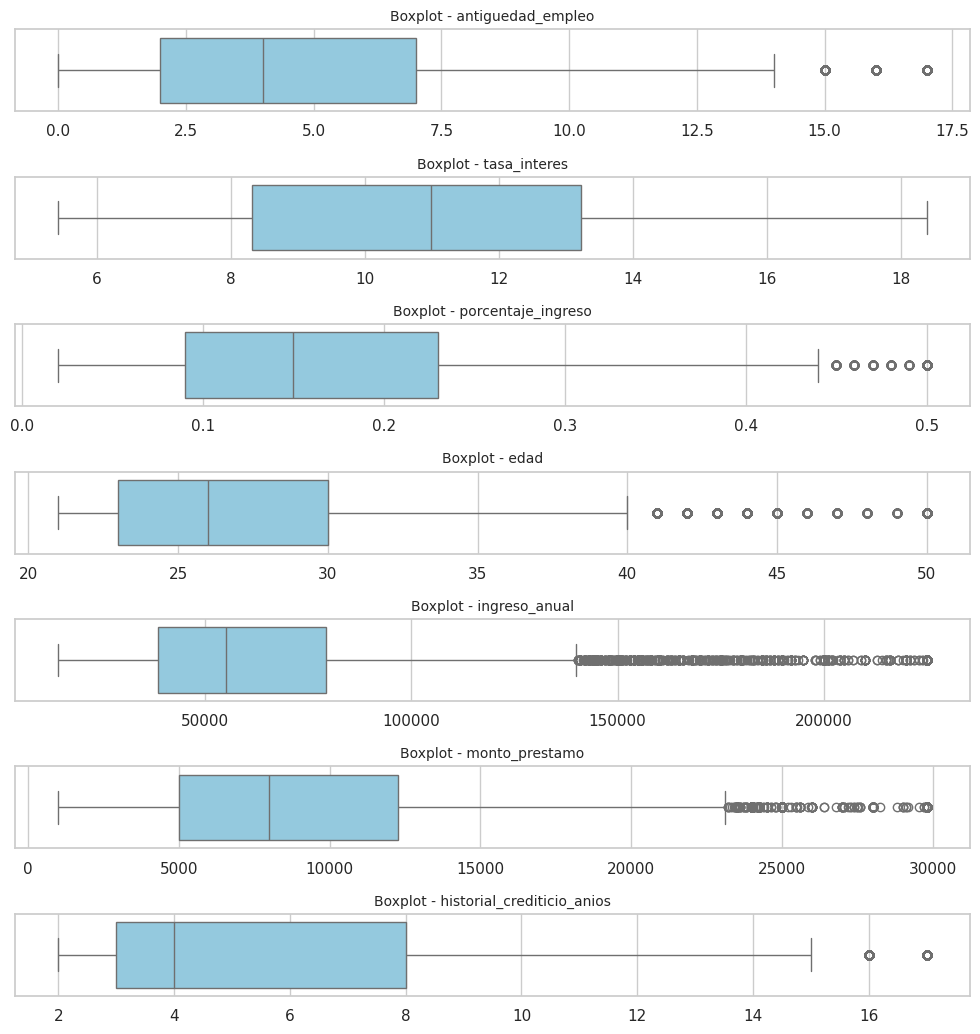

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables numéricas sin la variable objetivo
columnas_numericas = data.select_dtypes(include=['int', 'float']).columns.drop('incumplimiento')

# Crear figura de múltiples boxplots
plt.figure(figsize=(10, len(columnas_numericas) * 1.5))

for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(len(columnas_numericas), 1, i)
    sns.boxplot(x=data[col], color='skyblue')
    plt.title(f"Boxplot - {col}", fontsize=10)
    plt.xlabel("")

plt.tight_layout()
plt.show()


### Tratamiento de valores atípicos (outliers)

Se realizó un tratamiento de outliers en las variables numéricas del dataset con el fin de reducir su influencia en los modelos de machine learning.

#### Detección

Los valores atípicos fueron identificados utilizando el método del rango intercuartílico (IQR). Adicionalmente, se visualizaron mediante boxplots para evaluar su comportamiento antes y después del tratamiento.

#### Estrategia aplicada

Se aplicó winsorización utilizando los percentiles 1 y 99. Este enfoque permitió limitar los valores extremos sin eliminar registros, preservando así la estructura del dataset. La variable objetivo `incumplimiento` fue excluida de este proceso para mantener sus valores originales.

#### Verificación

Se corroboró visualmente que los valores extremos fueron recortados adecuadamente. La distribución general de las variables fue estabilizada, facilitando un entrenamiento más robusto y confiable de los modelos posteriores.

---


# Análisis de variables categóricas

Se identificaron las columnas categóricas del dataset con el objetivo de prepararlas para el posterior proceso de codificación. Estas variables, de tipo `object` o `category`, contienen información no numérica que debe transformarse en un formato adecuado para los modelos de machine learning.

Para cada variable categórica se analizó:

* La cantidad de categorías únicas.
* La frecuencia de aparición de cada categoría.
* La posible presencia de valores nulos o categorías poco representadas.

---

In [18]:
# Seleccionar columnas categóricas (tipo 'object' o 'category')
columnas_categoricas = data.select_dtypes(include=['object', 'category']).columns

# Mostrar nombre de las columnas y cantidad de valores únicos
for col in columnas_categoricas:
    print(f"\n📌 {col} ({data[col].nunique()} categorías)")
    print(data[col].value_counts(dropna=False))



📌 tenencia_vivienda (4 categorías)
tenencia_vivienda
RENT        16378
MORTGAGE    13369
OWN          2563
OTHER         106
Name: count, dtype: int64

📌 motivo_prestamo (6 categorías)
motivo_prestamo
EDUCATION            6411
MEDICAL              6042
VENTURE              5682
PERSONAL             5498
DEBTCONSOLIDATION    5189
HOMEIMPROVEMENT      3594
Name: count, dtype: int64

📌 calificacion_prestamo (7 categorías)
calificacion_prestamo
A    10703
B    10387
C     6438
D     3620
E      963
F      241
G       64
Name: count, dtype: int64

📌 incumplimiento_previo (2 categorías)
incumplimiento_previo
N    26686
Y     5730
Name: count, dtype: int64


In [19]:
data = pd.get_dummies(data, drop_first=True)
data

,antiguedad_empleo,tasa_interes,porcentaje_ingreso,edad,ingreso_anual,monto_prestamo,incumplimiento,historial_crediticio_anios,tenencia_vivienda_OTHER,tenencia_vivienda_OWN,...,motivo_prestamo_MEDICAL,motivo_prestamo_PERSONAL,motivo_prestamo_VENTURE,calificacion_prestamo_B,calificacion_prestamo_C,calificacion_prestamo_D,calificacion_prestamo_E,calificacion_prestamo_F,calificacion_prestamo_G,incumplimiento_previo_Y
0,17.0,16.02,0.50,22,59000,29800,1,3,False,False,...,False,True,False,False,False,True,False,False,False,True
1,5.0,11.14,0.10,21,14400,1000,0,2,False,True,...,False,False,False,True,False,False,False,False,False,False
2,1.0,12.87,0.50,25,14400,5500,1,3,False,False,...,True,False,False,False,True,False,False,False,False,False
3,4.0,15.23,0.50,23,65500,29800,1,2,False,False,...,True,False,False,False,True,False,False,False,False,False
4,8.0,14.27,0.50,24,54400,29800,1,4,False,False,...,True,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,1.0,13.16,0.11,50,53000,5800,0,17,False,False,...,False,True,False,False,True,False,False,False,False,False
32577,4.0,7.49,0.15,50,120000,17625,0,17,False,False,...,False,True,False,False,False,False,False,False,False,False
32578,3.0,10.99,0.46,50,76000,29800,1,17,False,False,...,False,False,False,True,False,False,False,False,False,False
32579,5.0,11.48,0.10,50,150000,15000,0,17,False,False,...,False,True,False,True,False,False,False,False,False,False


In [21]:
# Guardar el DataFrame codificado como CSV
data.to_csv('credit_risk_dataset_v_limpio.csv', index=False)

# Confirmación
print("Archivo guardado como 'credit_risk_dataset_v_limpio.csv'")

Archivo guardado como 'credit_risk_dataset_v_limpio.csv'
